### How to use camera 

In [1]:
import mujoco_py,cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from mujoco_parser import MuJoCoParserClass,random_spawn_objects,get_viewer_coordinate
from util import rpy2r,t2p,t2r
np.set_printoptions(precision=2)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("Ready.")

Ready.


### Parse `Panda` and place objects on the table

In [2]:
env = MuJoCoParserClass(name='Panda',xml_path='../asset/panda/franka_panda_w_objs.xml')
print ("Ready.")

Ready.


### Rotate camera views

In [ ]:
env.init_viewer(window_width=0.5,window_height=0.5,
                cam_azimuth=80.0,cam_distance=7.0,
                cam_elevation=-30.0,cam_lookat=np.array([0,0,1.5]))
random_spawn_objects(env,n_place=5)
# Loop
tick,max_tick = 0,500
while tick < max_tick:
    # Update
    tick = tick + 1
    tick_rate = tick / max_tick
    
    # Base position
    p_base = env.get_p_body(body_name='panda_link_0')
    
    # Set viwer pose
    cam_lookat    = p_base
    cam_distance  = 3.0
    cam_azimuth   = 360.0*tick_rate
    cam_elevation = -45
    
    # Get camera position
    T_viewer,T_lookat = get_viewer_coordinate(cam_lookat,cam_distance,cam_elevation,cam_azimuth)
    
    # Render
    env.add_marker_coordinate(p=p_base,R=np.eye(3),axis_len=1.0,axis_width=0.02,label='Base')
    env.add_marker_coordinate(p=t2p(T_viewer),R=t2r(T_viewer),axis_len=1.0,axis_width=0.02,label='Viewer')
    env.add_marker_coordinate(p=t2p(T_lookat),R=t2r(T_lookat),axis_len=1.0,axis_width=0.02,label='Lookat')
    MOVE_CAMERA = True
    if MOVE_CAMERA:
        env.set_viewer(
            cam_lookat    = cam_lookat,
            cam_distance  = cam_distance,
            cam_azimuth   = cam_azimuth,
            cam_elevation = cam_elevation)
    env.render() 
print ("Done.")

### Emulate camera movements

In [3]:
env.init_viewer(window_width=0.5,window_height=0.5,
                cam_azimuth=80.0,cam_distance=7.0,
                cam_elevation=-30.0,cam_lookat=np.array([0,0,1.5]))
random_spawn_objects(env,n_place=5)
# Loop
tick,max_tick = 0,500
imgs = []
while tick < max_tick:
    # Update
    tick = tick + 1
    tick_rate = tick / max_tick
    
    # Base position
    p_base = env.get_p_body(body_name='panda_link_0')
    
    # Set viwer pose
    cam_lookat    = p_base
    cam_distance  = 3.0
    cam_azimuth   = 360.0*tick_rate
    cam_elevation = -45
    
    # Get image
    for rc_idx in range(len(env.sim.render_contexts)):
        env.sim.render_contexts[rc_idx].cam.lookat[0] = cam_lookat[0]
        env.sim.render_contexts[rc_idx].cam.lookat[1] = cam_lookat[1]
        env.sim.render_contexts[rc_idx].cam.lookat[2] = cam_lookat[2]
        env.sim.render_contexts[rc_idx].cam.distance  = cam_distance
        env.sim.render_contexts[rc_idx].cam.azimuth   = cam_azimuth
        env.sim.render_contexts[rc_idx].cam.elevation = cam_elevation
    for _ in range(2):
        img = env.sim.render(width=env.viwer_width,height=env.viwer_height,depth=False)
    img = cv2.flip(cv2.rotate(img,cv2.ROTATE_180),1)
    imgs.append(img) # append image
    
print ("Done.")

Creating window glfw
Creating offscreen glfw
Done.


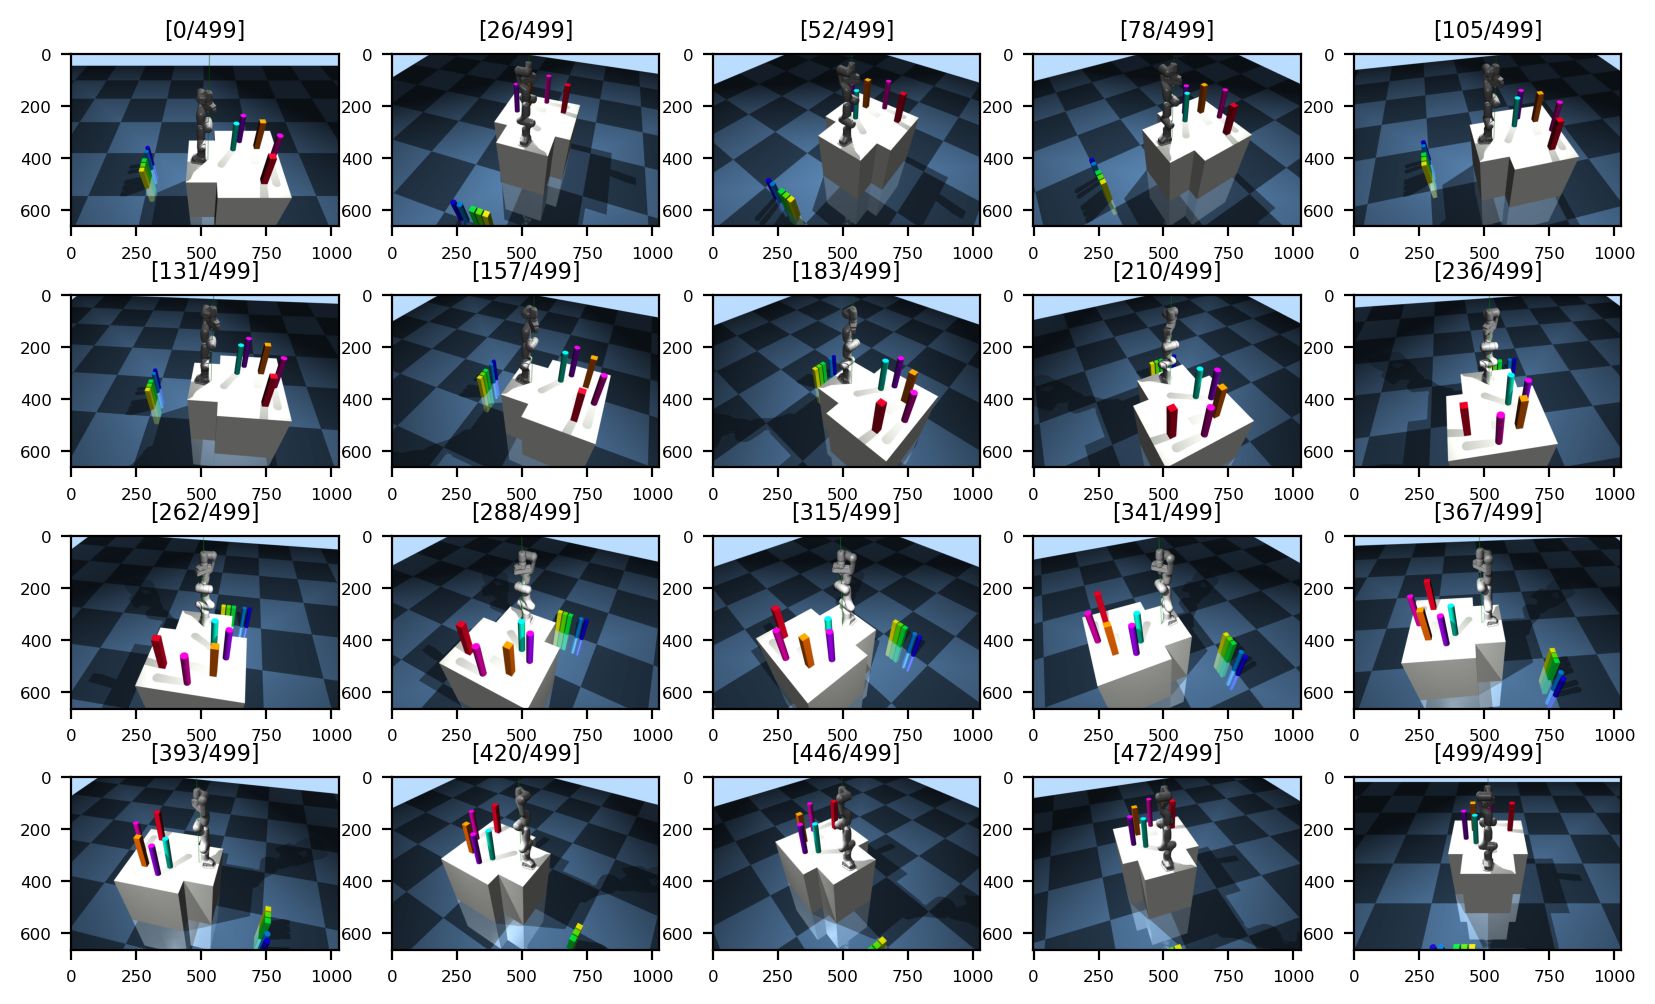

In [4]:
# Plot snapshots for Panda with FK
fig = plt.figure(figsize=(10,6))
for idx,tick in enumerate(np.linspace(0,max_tick-1,20).astype(np.int32)):
    img = imgs[tick]
    ax = fig.add_subplot(4,5,idx+1)
    ax.imshow(img)
    ax.set_title('[%d/%d]'%(tick,max_tick-1),fontsize=8)